# (Ford Gobike Data)
## by (Mustafa Awny)

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('/content/201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

I will need to do some feature engineering and transformations to be able to visualizae the data properly.

In [7]:
# load in the dataset into a pandas dataframe and clean up field dtypes
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])
data['user_type'] = data['user_type'].astype('category')
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day_cat = pd.api.types.CategoricalDtype(ordered=True, categories=week_day)
data['duration_minute'] = data['duration_sec']/60
data['start_date'] = data.start_time.dt.strftime('%Y-%m-%d')
data['hour_of_day'] = data.start_time.dt.strftime('%H')
data['day_of_week'] = data.start_time.dt.strftime('%A')
data['day_of_week'] = data['day_of_week'].astype(week_day_cat)


In [8]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_minute,start_date,hour_of_day,day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,No,869.750000,2019-02-28,17,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,No,708.683333,2019-02-28,18,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,No,1030.900000,2019-02-28,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,No,608.166667,2019-02-28,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Yes,26.416667,2019-02-28,23,Thursday


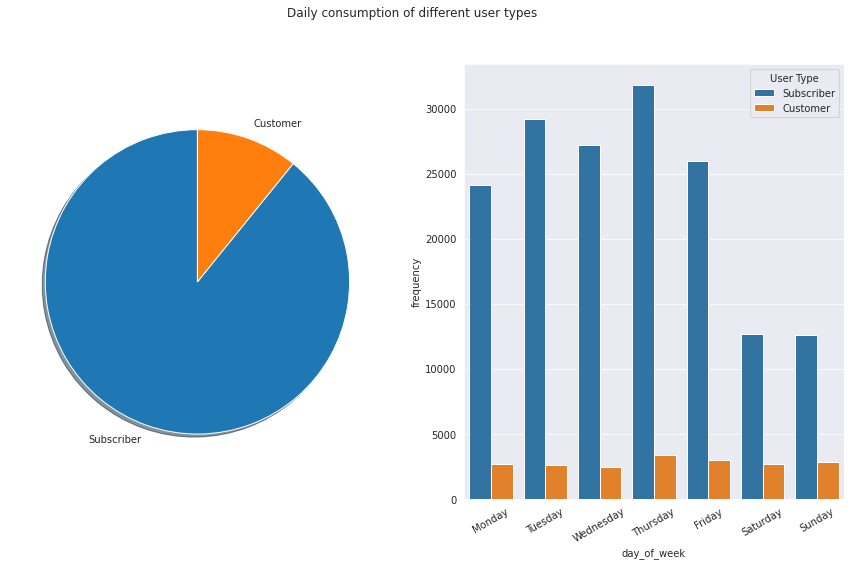

In [21]:
plt.figure(figsize=[15, 8]);
base_color = sb.color_palette('colorblind')[0];

plt.subplot(1, 2, 1);
sorted_values = data['user_type'].value_counts()/data.shape[0];
plt.pie(sorted_values, labels=sorted_values.index, startangle=90,shadow=True);

plt.subplot(1, 2, 2);
ax = sb.countplot(data=data, x='day_of_week', hue='user_type', hue_order=sorted_values.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.ylabel('frequency');
plt.suptitle('Daily consumption of different user types');

### We can see that the subscribers number is about 9 times the customer number. Also, we can notice that Staurday and Sunday have the lowest count of subscribers. Moreover, we can see that customers count does not depend clearly on the day of the week.

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

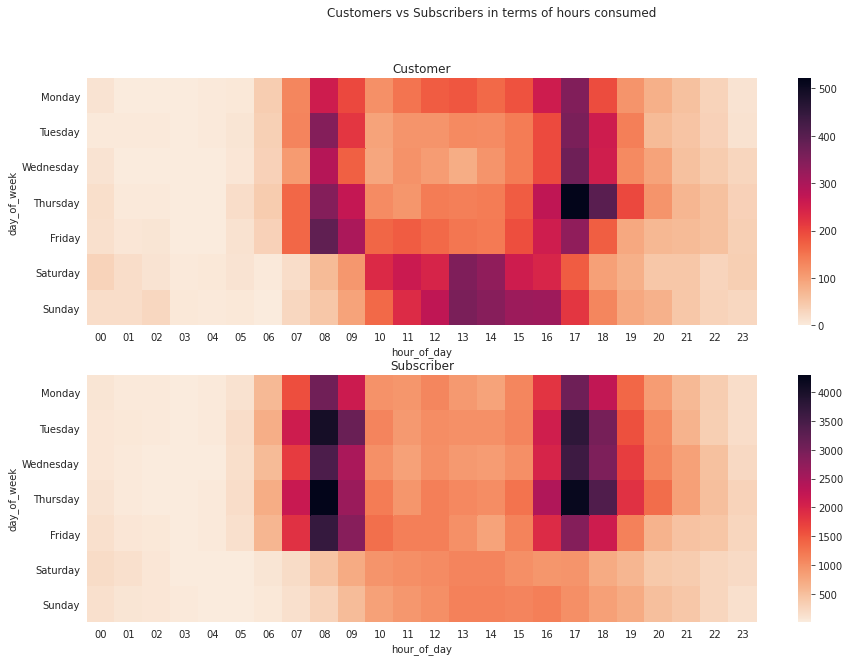

In [17]:
plt.figure(figsize=(15, 10))
plt.suptitle('Customers vs Subscribers in terms of hours consumed')
plt.subplot(2, 1, 1)
customer = data[data['user_type'] == "Customer"]
count = customer.groupby(['day_of_week', 'hour_of_day']).size()
count = count.reset_index(name='count')
count = count.pivot(index='day_of_week', columns='hour_of_day', values='count')
sb.heatmap(count, cmap='rocket_r');
plt.title('Customer');
plt.xlabel('hour_of_day');
plt.ylabel('day_of_week');

plt.subplot(2, 1, 2)
subscriber = data[data['user_type'] == "Subscriber"]
count1 = subscriber.groupby(['day_of_week', 'hour_of_day']).size()
count1 = count1.reset_index(name='count')
count1 = count1.pivot(index='day_of_week', columns='hour_of_day', values='count')
sb.heatmap(count1, cmap='rocket_r');
plt.title('Subscriber');
plt.xlabel('hour_of_day');
plt.ylabel('day_of_week');

### We can notice an increase of the customers in specific hours of the day from 7 to 9 AM and from 16 to 19 PM which can indicate the start and end of working days.

### The multivariate exploration supported the previous bivariate exploration as well as univariate exploration results. We also concluded that the day of week influence the trip duration, especially in days before weekends.

## (Visualization 3)



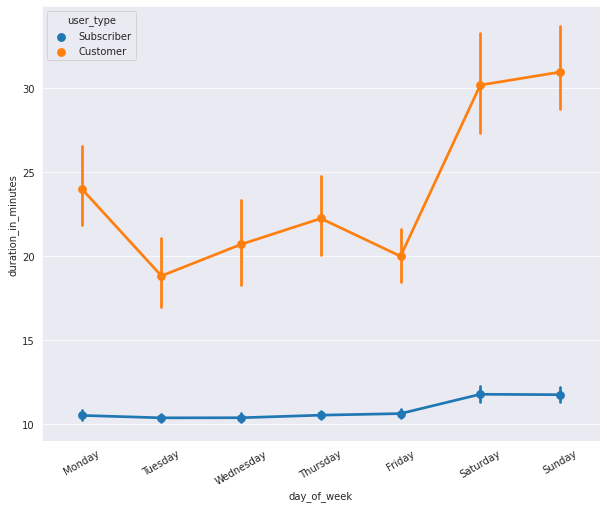

In [19]:
plt.figure(figsize=[10, 8])
sb.pointplot(data=data, x='day_of_week', y='duration_minute', hue='user_type', hue_order=sorted_values.index);
plt.xlabel('day_of_week');
plt.ylabel('duration_in_minutes');
plt.xticks(rotation=30);

### We can see that Saturday and Sunday have the highest trip duration which makes sense as people tend to return back to their home places in holidays. So, thers is a seasonal trend of trip duration increase in these days.

## Conclusion

### • The number of subscribers using the bike sharing system is much more than casual customers, about 9 times. 

### • Weekends have the highest trip durations for subscribers and casual customers.

### • Start and end hours of working days tend to have the highest count of both the subscribers and casual customers.

### • Subscribers tend to have less trip duration than the casual customers, which is interesting!


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!